## 4.1 Run ridge regression, choose the best $\lambda$

In [1]:
# import necessary modules
from setup_problem import load_problem
from ridge_regression import *
from setup_problem import get_target_and_featurizer
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np

In [2]:
lasso_data_fname = "lasso_data.pickle"
x_train, y_train, x_val, y_val, target_fn, coefs_true, featurize = load_problem(lasso_data_fname)

""" 
4.1.1. Run ridge regression on the provided training dataset.  Choose the λ that minimizes
the empirical risk (i.e.  the average square loss) on the validation set.  Include
a table of the parameter values you tried and the validation performance for each. (10 points) 
"""
grid, df_toshow = do_grid_search_ridge(featurize(x_train), y_train, featurize(x_val), y_val)

In [3]:
df_toshow

,param_l2reg,mean_test_score,mean_train_score
0,0.004820,0.120027,0.073094
1,0.004823,0.120027,0.073100
2,0.004826,0.120027,0.073106
3,0.004829,0.120027,0.073112
4,0.004832,0.120027,0.073117
5,0.004835,0.120027,0.073123
6,0.004838,0.120027,0.073129
7,0.004841,0.120027,0.073135
8,0.004844,0.120039,0.073141
9,0.004847,0.120039,0.073147


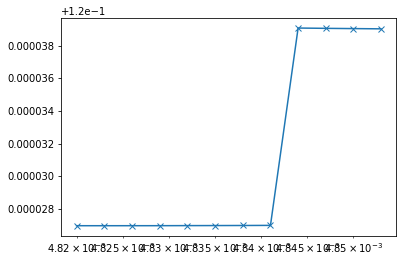

In [4]:
"""
4.1.2. Also include a plot of the results (Validation loss against l2 regularization parameters)
(5 points) 
Hint: you may want to use a log scale for the x axis
"""
# plt.semilogx(basex = 100)
# plt.semilogy(basey = 100)
pyplot.xscale('log')
plt.plot(df_toshow['param_l2reg'], df_toshow['mean_test_score'], "x-")

## 4.2 Visualize the prediction functions

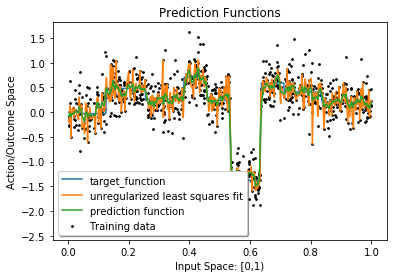

In [5]:
""" 
4.2 Now we want to visualize the prediction functions.  On the same axes, plot the following:
the training data, the target function, an unregularized least squares fit (still using the 
featurized data),and the prediction function chosen in the previous problem. (5 points) 
Hint: you may find plot_prediction_functions() from ridge_regression module useful
"""
my_best_lambda = 0.004841

# initialize a model with the λ chosen in 4.1, fit the model
myRegression_regularized = RidgeRegression(my_best_lambda).fit(featurize(x_train), y_train)
# initialize a model without regularization, fit the model
myRegression_unregularized = RidgeRegression(0).fit(featurize(x_train), y_train)
# Plot the training data, the target function, an unregularized least square fit, 
# the prediction function chosen in 4.1
x, idx = np.unique(x_train, return_index = True)
y = y_train[idx]
pred_fns = []
pred_fns.append(dict())
pred_fns[0]['name'] = 'target_function'  
pred_fns[0]['preds'] = target_fn(x)
pred_fns.append(dict())
pred_fns[1]['name'] = 'unregularized least squares fit'  
pred_fns[1]['preds'] = myRegression_unregularized.predict(featurize(x))
pred_fns.append(dict())
pred_fns[2]['name'] = 'prediction function'  
pred_fns[2]['preds'] = myRegression_regularized.predict(featurize(x))
my_plot = plot_prediction_functions(x, pred_fns, x, y, legend_loc="best")

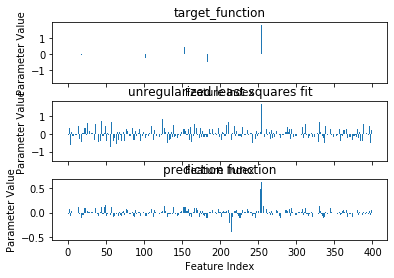

In [6]:
""" 
Next, along the lines of the bar charts produced by the code in compare_parameter_vectors, 
visualize the coefficients for each of the prediction functions plotted, including the target 
function. (5 points) 
Hint: you may find compare_parameter_vectors() from ridge_regression module useful
"""
pred_fns = []
pred_fns.append(dict())
pred_fns[0]['name'] = 'target_function'  
pred_fns[0]['coefs'] = coefs_true
pred_fns.append(dict())
pred_fns[1]['name'] = 'unregularized least squares fit'  
pred_fns[1]['coefs'] = myRegression_unregularized.w_
pred_fns.append(dict())
pred_fns[2]['name'] = 'prediction function'  
pred_fns[2]['coefs'] = myRegression_regularized.w_

fig = compare_parameter_vectors(pred_fns)

In [7]:
""" 
Describe the patterns, including the scale of the coefficients, as well as which coefficients 
have the most weight (5 points) 
"""
result1 = np.where(pred_fns[0]['coefs'] == np.amax(pred_fns[0]['coefs']))
result2 = np.where(pred_fns[1]['coefs'] == np.amax(pred_fns[1]['coefs']))
result3 = np.where(pred_fns[2]['coefs'] == np.amax(pred_fns[2]['coefs']))
print(result1, result2, result3)

(array([254]),) (array([254]),) (array([254]),)


The parameter value aligns with the piece-wise prediction functions: where the prediction functions decreases sharply the parameter value decreases relatively significantly. The scale of coefficients are pretty small, basically around 0 and approximate in the range (-1,1). A few coefficients have higher weight, and the coefficients have the most weight in all these 3 fits occur at 255th coefficient.